In [2]:
import numpy as np 
import pandas as pd

In [3]:
data = pd.read_csv('C:\\Users\\Amena\\Desktop\\creditcard.csv')
print("Input Data")
data.shape

Input Data


(284807, 31)

In [4]:
data = pd.read_csv('C:\\Users\\Amena\\Desktop\\creditcard.csv',sep=',')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data.isnull().values.any()

False

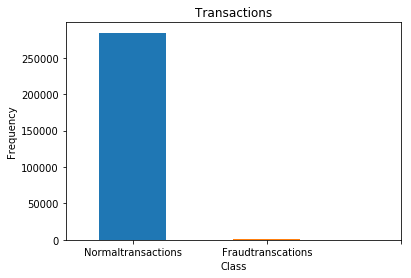

In [6]:
import sklearn
import scipy
import matplotlib.pyplot as plt
labels = ["Normaltransactions", "Fraudtranscations"]
class_count = pd.value_counts(data['Class'], sort = True)#Returns object containing counts of unique values by sorting
class_count.plot(kind = 'bar', rot=0)
plt.title("Transactions")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [7]:
#Check the number of valid transactions in the entire dataset
valid_transactions = data[data['Class']==0]
x= valid_transactions.shape
print("Valid Cases : ", x)

#Check the number of fraud transactions in the entire dataset
fraud_transactions = data[data['Class']==1]
y = fraud_transactions.shape
print("Fraud Cases : ", y)

Valid Cases :  (284315, 31)
Fraud Cases :  (492, 31)


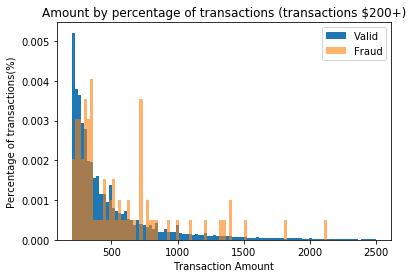

In [8]:
import warnings
warnings.filterwarnings('ignore')
#Plotting the high value transactions
bins = np.linspace(200, 2500, 100)
plt.hist(valid_transactions.Amount, bins, alpha=1, normed=True, label='Valid')
plt.hist(fraud_transactions.Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction Amount")
plt.ylabel("Percentage of transactions(%)");
plt.show()

In [9]:
from sklearn.preprocessing import RobustScaler

import time

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)


In [10]:

scaled_time = data['scaled_time']
scaled_amount = data['scaled_amount']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...         V20       V21  \
0 -0.338321  0.462388  0.239599  0.098698  ...    0.251412 -0.018307   
1  0.060018 -0.082361 -0.078803  0.085102  ...   -0.069083 -0.225775   
2 -0.503198  1.800499  0.791461  0.247676  ...    0.524980  0.247998   
3 -0.010309  1.247203  0.237609  0.377436  ...   -0.208038 -0.108300   
4 -0.407193  0.095921  0.592941 -0.270533  ...    0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  Class  
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]

In [11]:
#  For normal distribution of the classes we need to balance the classes.

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
valid_data = data.loc[data['Class'] == 0][:492]

normal_distribution = pd.concat([fraud_data, valid_data])

# Shuffle dataframe rows
dist_data = normal_distribution.sample(frac=1, random_state=42)

dist_data.head()

scaled_amount  scaled_time         V1        V2         V3        V4  \
220148       0.763222     0.673798   1.810493 -0.636043  -0.084171  0.437225   
43160        3.507441    -0.508641 -14.970346  8.401421 -16.867238  8.252334   
61294        0.130930    -0.410472  -1.154943  0.877587   1.255411  0.857157   
120837       1.088521    -0.102374  -5.140723  3.568751  -5.896245  4.164720   
79536       -0.293440    -0.312797  -0.264869  3.386140  -3.454997  4.367629   

               V5        V6         V7        V8  ...         V20       V21  \
220148  -0.697385  0.191681  -0.770044  0.133226  ...    0.034741  0.104639   
43160  -13.565130 -2.782438 -14.263735  9.643419  ...   -1.614660  2.714045   
61294    0.240568 -0.780469   1.038153 -0.505295  ...   -0.109873  0.008904   
120837  -4.091193 -1.989960  -5.472436  2.422821  ...    0.318995  1.131130   
79536    3.336060 -2.053918   0.256890 -2.957235  ...    0.482513 -1.394504   

             V22       V23       V24       V25       V26       V27       V28  \
220148  0.330124  0.190330 -0.424492 -0.518730  0.161247  0.001150 -0.034216   
43160  -0.101355 -0.439666  0.519514  0.789328  0.064357 -1.621386 -1.104819   
61294   0.462393  0.058213  0.385560  0.000703 -0.341552 -0.245474  0.023293   
120837  0.118022 -0.332704  0.139941  0.324758 -0.180769  0.177810  0.661555   
79536  -0.166029 -1.452081 -0.251815  1.243461  0.452787  0.132218  0.424599   

        Class  
220148      0  
43160       1  
61294       0  
120837      1  
79536       1  

[5 rows x 31 columns]

Distribution of the Classes after the sub sampling dataset
1    0.5
0    0.5
Name: Class, dtype: float64


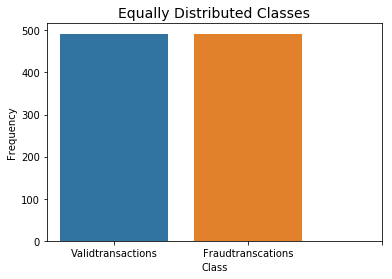

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Distribution of the Classes after the sub sampling dataset')
print(dist_data['Class'].value_counts()/len(dist_data))

labels = ["Validtransactions", "Fraudtranscations"]

sns.countplot('Class', data=dist_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.show()

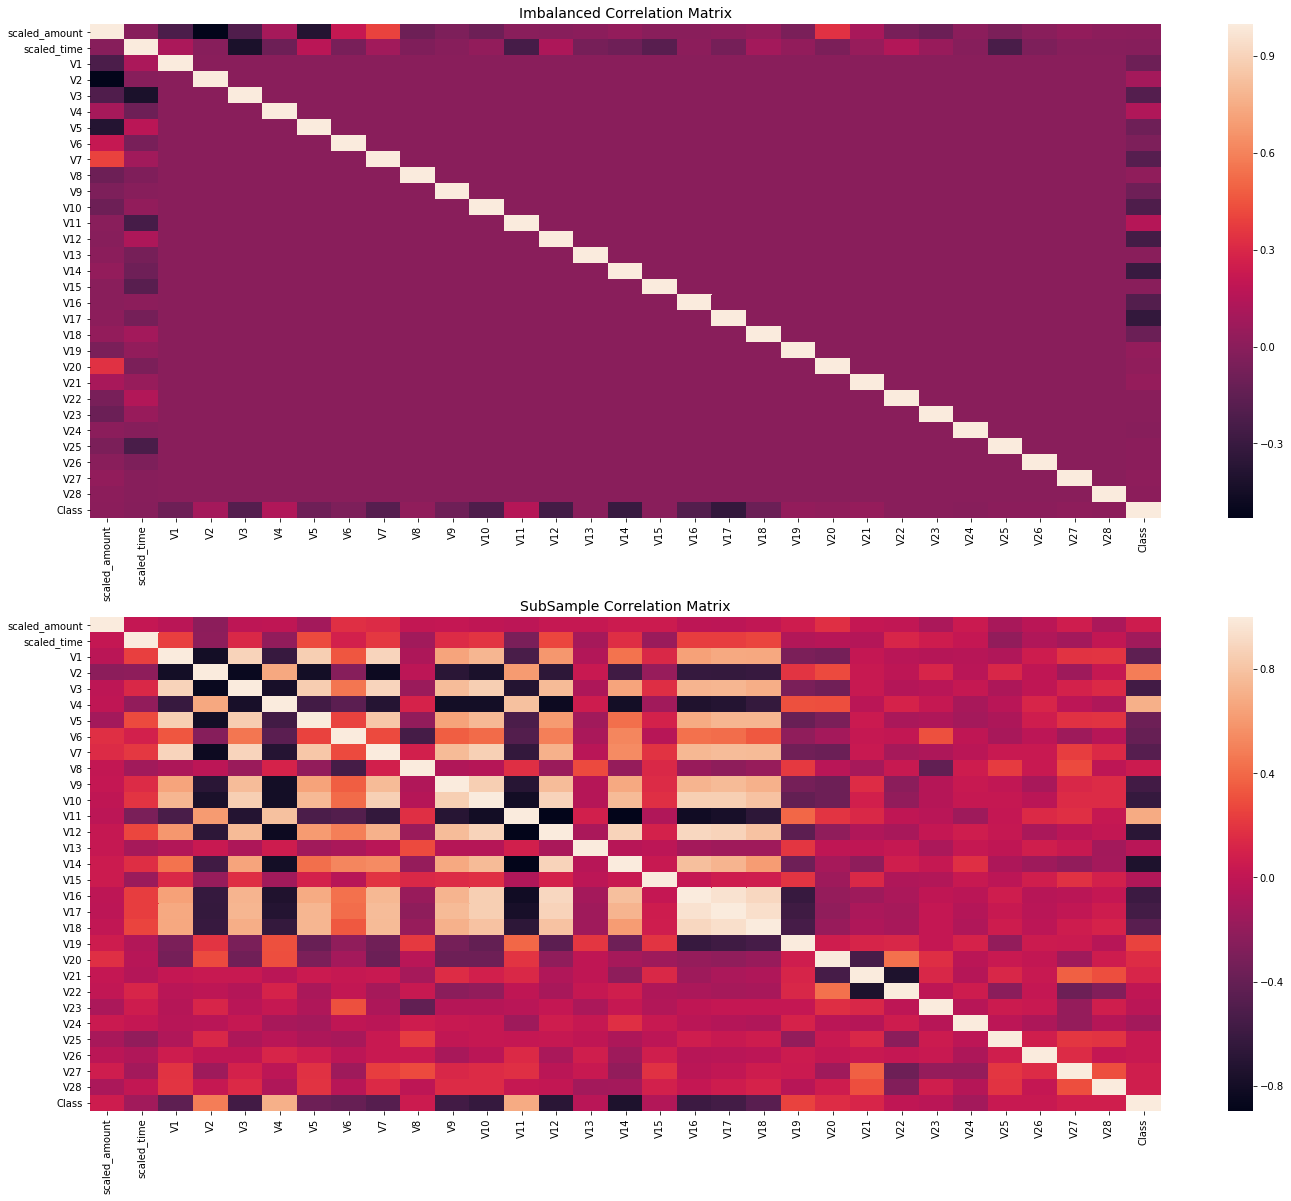

In [13]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
correlation = data.corr()
sns.heatmap(correlation, ax=axis1)
axis1.set_title("Imbalanced Correlation Matrix", fontsize=14)


subsamp_correlation = dist_data.corr()
sns.heatmap(subsamp_correlation, ax=axis2)
axis2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

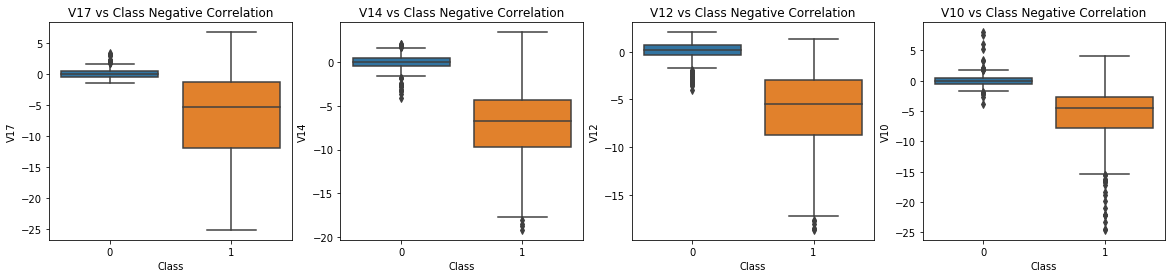

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=dist_data, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=dist_data, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data= dist_data, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data= dist_data, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

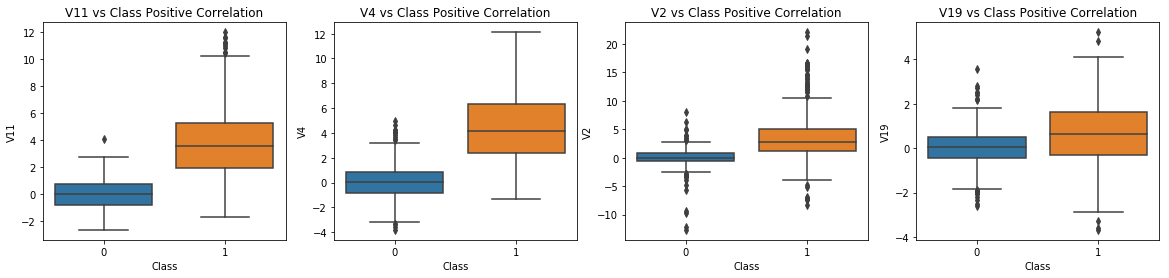

In [18]:

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=dist_data, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=dist_data, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=dist_data, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=dist_data, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [23]:
dist_data.drop(columns= ['V1', 'V3', 'V5', 'V6', 'V8', 'V9', 'V11', 'V13', 'V15', 'V16', 'V18', 'V23', 'V20', 'V21', 'V22', 'V24', 'V25', 'V26','V27','V28'])





scaled_amount  scaled_time         V2         V4         V7  \
220148       0.763222     0.673798  -0.636043   0.437225  -0.770044   
43160        3.507441    -0.508641   8.401421   8.252334 -14.263735   
61294        0.130930    -0.410472   0.877587   0.857157   1.038153   
120837       1.088521    -0.102374   3.568751   4.164720  -5.472436   
79536       -0.293440    -0.312797   3.386140   4.367629   0.256890   
70478        0.950185    -0.361952  -0.849538   1.072137  -1.090424   
241467       1.237057     0.779438  -0.237005   0.186689   0.473701   
177195      -0.153706     0.450969   0.415616   1.536844  -2.377140   
36611       -0.159575    -0.541301   0.340859   2.835370  -0.087800   
18530       -0.293440    -0.647564   1.023966   0.468391   0.184510   
214775      -0.297771     0.647611  -0.751792  -0.203459  -0.076548   
103082       0.111647    -0.190381   1.253140   0.205127   0.385990   
197424       2.347516     0.555892  -1.052638   0.154252  -0.499904   
275860       0.305177     0.964144  -0.204680   0.421136  -0.050624   
42945       -0.296793    -0.509686   6.990389   8.694897 -14.594562   
137705      -0.293440    -0.028231   1.975528   2.819191  -1.196101   
6334        -0.293440    -0.906460   4.132464   6.348557  -1.689102   
105441      -0.296793    -0.178186   0.331464  -0.346175  -0.187547   
189641      10.738629     0.514621  -2.867309   0.868843   0.449072   
6331        -0.293440    -0.906566   4.137837   6.675732  -1.631735   
199896      18.346957     0.569697  -2.484824   3.670562   1.017732   
15451        1.089779    -0.679742  12.373989   6.144821 -15.939003   
99621        0.490882    -0.205465  -1.186442   1.491468  -1.962770   
154371      -0.275554     0.195268  19.167239  11.125435 -37.060311   
108033       0.111647    -0.164053   1.256330  -0.787473  -2.560821   
230076      -0.296653     0.722365   4.251181   7.283657  -1.865911   
154587      -0.307413     0.204678  21.467203  11.737436 -41.506796   
6899        -0.293440    -0.890682   5.856393   6.379742  -3.103570   
157585      -0.293440     0.298347   0.650678   3.987828  -0.021483   
203700      -0.307413     0.590186   3.238070   5.720847  -0.781880   
...               ...          ...        ...        ...        ...   
156988      -0.307413     0.289066   2.809299   5.835566  -2.916576   
64329        1.089779    -0.394507   7.365546   4.273323  -8.350808   
53591       -0.293440    -0.453894   1.786495   1.214335  -1.709109   
165641       0.584783     0.386118  -1.012328  -0.442077  -0.610351   
27738        1.443443    -0.587507   2.591458   1.286244  -2.206056   
153885      -0.296793     0.185728   5.151094   4.534479  -4.425230   
17480        1.089779    -0.657162  16.713389   6.534984 -20.371514   
30860        0.251520    -0.570754  -0.207436  -2.087943   0.472775   
58422        2.607140    -0.426603  -1.464269   1.921356   0.780731   
269080       1.089918     0.926092  -0.160111   1.094002  -2.153074   
93486       -0.307413    -0.237890   0.872988   2.755369  -0.042848   
199768       0.415706     0.569039  -0.585549  -3.320925   0.267005   
68585        5.036540    -0.371727  -0.816723  -0.593497   1.082098   
135718      -0.201635    -0.039004   1.790649   3.853433  -2.988383   
43624        0.243834    -0.506467   1.300219   2.589843  -2.175778   
77387        5.899113    -0.325016   2.225380   2.178538  -1.734948   
154670       1.145812     0.209084   4.064043   4.680008  -4.490847   
45732       -0.293440    -0.495988   3.375110   6.136378  -1.668931   
10897       -0.293440    -0.775409   7.472324  11.165526 -14.913330   
68320       -0.296793    -0.373101   0.407227   3.161821  -0.689804   
189587       0.641375     0.514327   1.337658   3.245358  -2.506349   
123663       0.502061    -0.090191  -0.199824   0.389045  -0.331760   
26802       -0.041640    -0.592535   1.554890   3.241617  -1.515521   
206380      -0.028645     0.604977  -0.033357  -1.819779   0.029328   
249607       0.181653     0.8200

In [24]:
# Undersampling before cross validating (prone to overfit)
features = dist_data.drop('Class', axis=1)
label = dist_data['Class']
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = x_train.values
X_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [25]:
#importing the required libraries
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [28]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, GridSearchCV,RandomizedSearchCV

def train_test_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    
    print("\nAccuracy Scores on Train data")
    print("Accuracy score:", accuracy_score(y_train, y_pred))
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))
    
    
    print("\nAccuracy Scores on Cross validation data")
    y_pred_cv = cross_val_predict(model,x_train,y_train,cv=5)
    print("F1 Score: ", f1_score(y_train,y_pred_cv))
    print("Precision Score: ", precision_score(y_train,y_pred_cv))
    print("Recall Score: ", recall_score(y_train,y_pred_cv))



    print("\nAccuracy Scores on Test data")
    y_pred_test = model.predict(x_test)
    print("\nAccuracy score:", accuracy_score(y_test, y_pred_test))
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    axis1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='viridis',annot=True)
    plt.title("Confusion Matrix - Train Data")

    axis3 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='viridis',annot=True)
    plt.title("Confusion Matrix - Test Data")


Accuracy Scores on Train data
Accuracy score: 0.9440914866581956
F1 Score:  0.940700808625337
Precision Score:  0.9694444444444444
Recall Score:  0.9136125654450262

Accuracy Scores on Cross validation data
F1 Score:  0.9230769230769231
Precision Score:  0.9526462395543176
Recall Score:  0.8952879581151832

Accuracy Scores on Test data

Accuracy score: 0.949238578680203
F1 Score:  0.9532710280373831
Precision Score:  0.9807692307692307
Recall Score:  0.9272727272727272


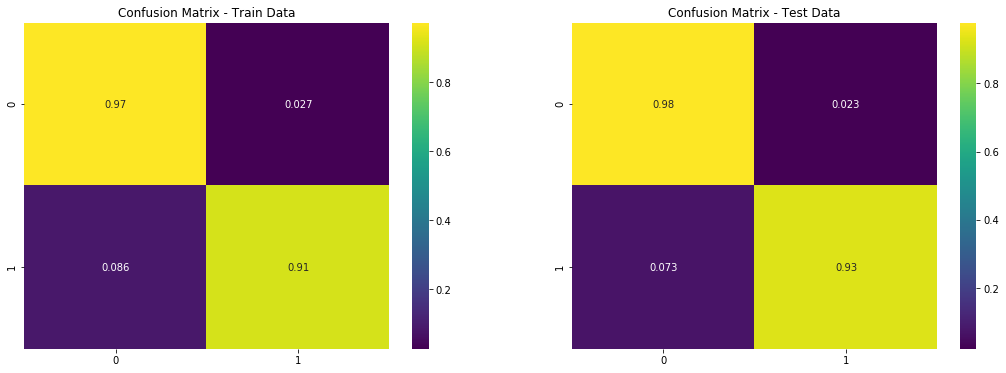

In [29]:
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score

#Applying Linear regression model
log_reg = LogisticRegression()

train_test_model(log_reg, x_train, x_test, y_train, y_test)




Accuracy Scores on Train data
Accuracy score: 0.9555273189326556
F1 Score:  0.9528936742934051
Precision Score:  0.9806094182825484
Recall Score:  0.9267015706806283

Accuracy Scores on Cross validation data
F1 Score:  0.9197278911564626
Precision Score:  0.9575070821529745
Recall Score:  0.8848167539267016

Accuracy Scores on Test data

Accuracy score: 0.9390862944162437
F1 Score:  0.9428571428571428
Precision Score:  0.99
Recall Score:  0.9


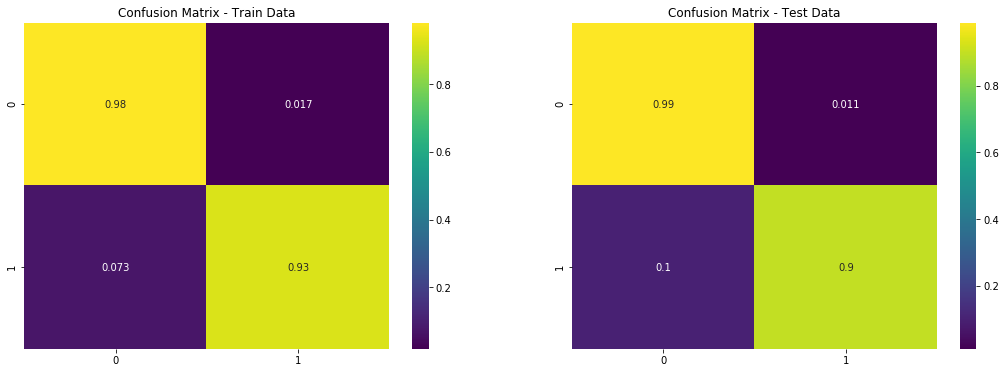

In [30]:
svc_clf = SVC(kernel='linear', degree=3,shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None)

train_test_model(svc_clf, x_train, x_test, y_train, y_test)




Accuracy Scores on Train data
Accuracy score: 0.9644218551461246
F1 Score:  0.9622641509433962
Precision Score:  0.9916666666666667
Recall Score:  0.9345549738219895

Accuracy Scores on Cross validation data
F1 Score:  0.9195710455764075
Precision Score:  0.9423076923076923
Recall Score:  0.8979057591623036

Accuracy Scores on Test data

Accuracy score: 0.934010152284264
F1 Score:  0.9389671361502346
Precision Score:  0.970873786407767
Recall Score:  0.9090909090909091


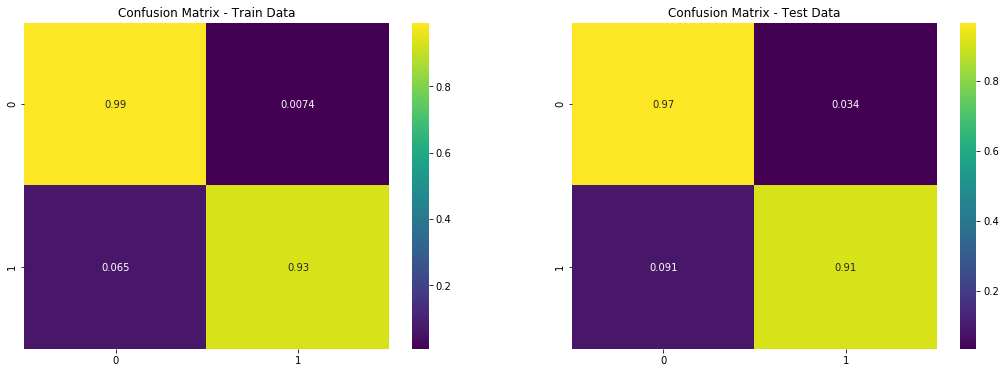

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors =3, metric='minkowski')
train_test_model(knn_clf, x_train, x_test, y_train, y_test)


